In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

## Load And Preprocess The data

In [6]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data (convert pixel values to range 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape data to fit CNN input (28x28 images, 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Print shape of dataset
print(f"Training Data Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels: {y_test.shape}")


Training Data Shape: (60000, 28, 28, 1), Labels: (60000,)
Testing Data Shape: (10000, 28, 28, 1), Labels: (10000,)


## Building The CNN Model

In [8]:

model = keras.Sequential([
    # Convolutional Layer 1: Extracts features with 32 filters of 3x3 size
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),

    # Max Pooling Layer 1: Reduces size by taking max value from 2x2 region
    layers.MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer 2: More filters (64) for deeper feature extraction
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),

    # Max Pooling Layer 2
    layers.MaxPooling2D(pool_size=(2,2)),

    # Flatten Layer: Converts 2D feature maps into a 1D vector
    layers.Flatten(),

    # Fully Connected Layer: 128 neurons
    layers.Dense(128, activation='relu'),

    # Output Layer: 10 neurons (10 digit classes), using Softmax activation
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [9]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9084 - loss: 0.2984 - val_accuracy: 0.9827 - val_loss: 0.0523
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9863 - loss: 0.0435 - val_accuracy: 0.9873 - val_loss: 0.0367
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0285 - val_accuracy: 0.9876 - val_loss: 0.0391
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9939 - loss: 0.0194 - val_accuracy: 0.9904 - val_loss: 0.0304
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9964 - loss: 0.0115 - val_accuracy: 0.9899 - val_loss: 0.0328
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9965 - loss: 0.0100 - val_accuracy: 0.9916 - val_loss: 0.0294
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9974 - loss: 0.0075 - val_accuracy: 0.9916 - val_loss: 0.0292
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9981 - loss: 0.0065

## Model Evaluate

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0591

Test Accuracy: 0.9900


We have Achieved a greate training accuracy of 98.6% and a test accuracy of 99%. it is good accuracy then the our previous model of Multy Layer Perceptron model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


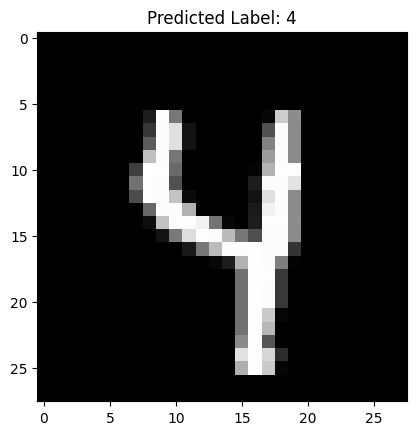

In [11]:
import random

# Pick a random image from test set
idx = random.randint(0, len(X_test) - 1)
image = X_test[idx]

# Predict class
pred = np.argmax(model.predict(image.reshape(1,28,28,1)))

# Plot the image and prediction
plt.imshow(image.reshape(28,28), cmap='gray')
plt.title(f"Predicted Label: {pred}")
plt.show()


Great.... Our Model predicts correctly....